Classification And Regression Trees


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Hitters.csv to Hitters.csv
User uploaded file "Hitters.csv" with length 20906 bytes


In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state= 42)

In [5]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [6]:
cart_model = DecisionTreeRegressor()

In [8]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

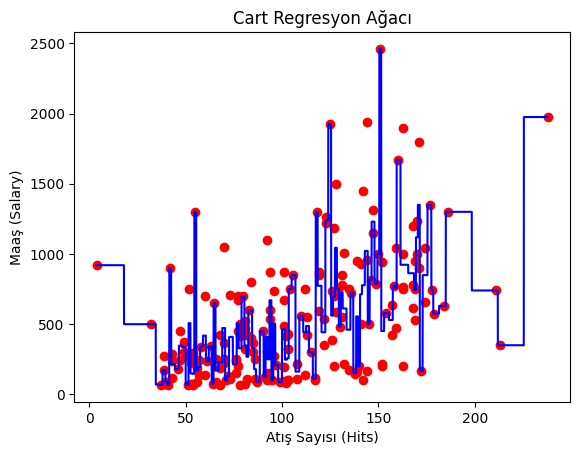

In [10]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train , color='red')
plt.plot(X_grid, cart_model.predict(X_grid),color= 'blue')
plt.title('Cart Regresyon Ağacı')
plt.xlabel('Atış Sayısı (Hits)')
plt.ylabel('Maaş (Salary)');


In [15]:
pip install skompiler


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54314 sha256=1602c6261d119b5c454e1e02dc6d12870c176092c33a2ac571e084cfd0ebe3bf
  Stored in directory: /root/.cache/pip/wheels/c0/22/3d/bd8fd4c6cd205cf122a0974be908681472a6f44abd6b880614
Successfully built skompiler


In [16]:
from skompiler import skompile

In [18]:
print(skompile(cart_model.predict))

(if (x[0] <= 117.5) then (if (x[0] <= 18.0) then 920.0 else (if (x[0] <= 76.5) then (if (x[0] <= 41.5) then (if (x[0] <= 34.5) then 500.0 else (if (x[0] <= 39.5) then (if (x[0] <= 38.0) then 70.0 else 175.0) else (if (x[0] <= 40.5) then 90.0 else 67.5))) else (if (x[0] <= 42.5) then 900.0 else (if (x[0] <= 54.5) then (if (x[0] <= 52.5) then (if (x[0] <= 51.5) then (if (x[0] <= 50.0) then (if (x[0] <= 46.5) then (if (x[0] <= 44.5) then 215.55566666666664 else 180.0) else (if (x[0] <= 48.0) then 347.5 else 337.5)) else 70.0) else 507.5) else (if (x[0] <= 53.5) then 150.0 else 146.83333333333334)) else (if (x[0] <= 55.5) then 1300.0 else (if (x[0] <= 57.5) then (if (x[0] <= 56.5) then 170.0 else 193.75) else (if (x[0] <= 70.5) then (if (x[0] <= 69.0) then (if (x[0] <= 65.5) then (if (x[0] <= 64.5) then (if (x[0] <= 63.5) then (if (x[0] <= 60.5) then (if (x[0] <= 59.0) then 340.0 else 418.5) else (if (x[0] <= 62.0) then 235.0 else 341.667)) else 75.0) else 650.0) else (if (x[0] <= 67.0) th

In [25]:
cart_model.predict([[91]])

array([125.])

In [26]:
y_pred = cart_model.predict(X_test)

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [30]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10, min_samples_split = 10)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [31]:
np.sqrt(mean_squared_error(y_test, y_pred))

450.82936090249154

In [44]:
cart_params= {"min_samples_split" : range(2,100),
              "max_leaf_nodes" : range(2,10)}

In [46]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)


In [47]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_leaf_nodes=10,
                                             min_samples_split=10),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [50]:
cart_tuned =  DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split= 76)

In [52]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [53]:
y_pred = cart_tuned.predict(X_test)

In [54]:
np.sqrt(mean_squared_error(y_test, y_pred))

423.406689243066